In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [166]:
def bachelier_formula_no_interest(t, St, T, sigma, K):
    d_time = T - t
    d_price = St - K
    return sigma ** 2 * d_time * stats.norm.pdf(d_price / (sigma ** 2 * d_time)) + d_price * stats.norm.cdf(d_price / (sigma ** 2 * d_time))

# def bachelier_formula(t, St, T, sigma, K, r):
#     v = sigma * np.sqrt((1 - np.exp(-2 * r * (T - t))) / (2 * r))
#     L = np.exp(- r * (T - t)) * K
#     d = St - L
#     return (St - L) * stats.norm.cdf(d / v) + v * stats.norm.pdf(d / v)

def bachelier(sigma, S, K, r, t):
    d = (S * np.exp(r*t) - K) / np.sqrt(sigma**2/(2 * r) * (np.exp(2*r*t)-1) )
   
    C = np.exp(-r * t) * (S * np.exp(r * t) - K) * stats.norm.cdf(d) + \
        np.exp(-r * t) * np.sqrt(sigma**2/(2*r) * (np.exp(2*r*t)-1) ) * stats.norm.pdf(d)

    return C

In [162]:
def monte_carlo_bachelier_with_interest(S0, T, sigma, K, r, N):
    Z = np.random.standard_normal(N)
    c = sigma * np.sqrt((np.exp(2 * r * T) - 1) / (2 * r))
    ST = S0 + c * Z
    return np.exp(-r * T) * np.maximum(ST - K, 0).mean()

In [163]:
def monte_carlo_bachelier(S0, T, sigma, K, N):
    Z = np.random.standard_normal(N)
    ST = S0 + sigma * np.sqrt(T) * Z
    return np.maximum(ST - K, 0).mean()

In [211]:
S0_values = np.linspace(80, 120, 200)
T_values = np.linspace(0.01, 1, 5)
K = 100
sigma = 0.1
r = 0.01
num_simulations = 10000

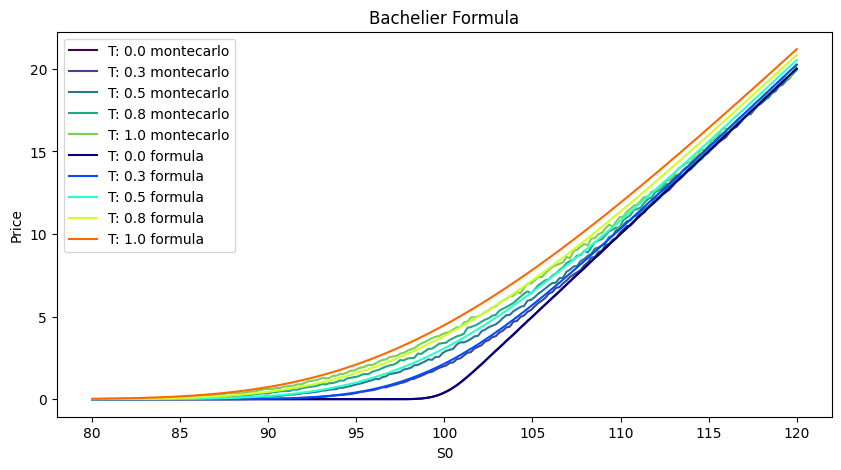

In [212]:
plt.figure(figsize=(10, 5))
colomap = plt.cm.viridis

for i in range(len(T_values)):
    prices_monte_carlo = [monte_carlo_bachelier_with_interest(S0, T_values[i], sigma * S0, K, r, num_simulations) for S0 in S0_values]
    plt.plot(S0_values, prices_monte_carlo, label=f"T: {T_values[i]:0.1f} montecarlo", color=colomap(i / len(T_values)))

plt.xlabel('S0')
plt.ylabel('Price')
plt.legend()
plt.title('Monte Carlo Bachelier Formula')
# plt.show()

# plt.figure(figsize=(10, 5))
colomap = plt.cm.jet

for i in range(len(T_values)):
    prices_formula = [bachelier(sigma * S0, S0, K, r, T_values[i]) for S0 in S0_values]
    plt.plot(S0_values, prices_formula, label=f"T: {T_values[i]:0.1f} formula", color=colomap(i / len(T_values)))

plt.xlabel('S0')
plt.ylabel('Price')
plt.legend()
plt.title('Bachelier Formula')
plt.show()

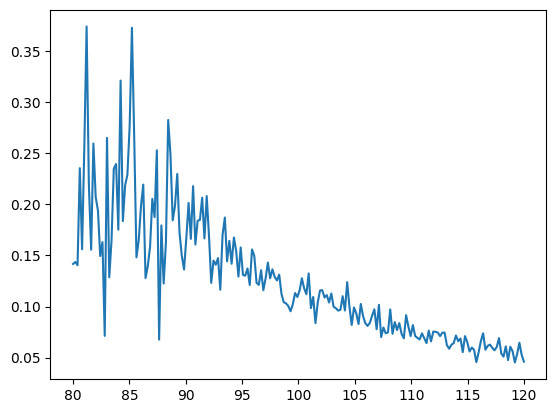

In [213]:
plt.plot(S0_values, np.abs((np.array(prices_formula) - np.array(prices_monte_carlo)) / np.array(prices_formula))) 

In [ ]:
def bachelier_d(sigma, S, K, r, t):
